In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [3]:
df.columns

Index(['id', 'date', 'first_name', 'last_name', 'email', 'gender',
       'ip_address', 'country', 'price_paid', 'tax'],
      dtype='object')

In [4]:
df['tax'] = df['tax'].mode()[0]

In [5]:
df['gender'] = df['gender'].fillna('Inconnu')

In [6]:
df['country'] = df['country'].fillna('Inconnu')

In [7]:
df['price_paid'] = (
    df['price_paid']
    .str.replace('$','')
    .str.replace(',','')
    .astype(float)
)

In [8]:
df

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
0,1,2021-03-28,Marylin,Alders,malders0@shop-pro.jp,Male,160.119.8.119,Canada,5.36,20.0
1,2,2021-03-19,Hinda,Harridge,hharridge1@gnu.org,Female,210.51.172.132,Canada,8.32,20.0
2,3,2021-03-17,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0
3,4,2021-03-19,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,3.70,20.0
4,5,2021-03-24,Kanya,Beasant,kbeasant4@jigsy.com,Male,106.252.162.233,Morocco,9.24,20.0
...,...,...,...,...,...,...,...,...,...,...
995,996,2021-03-24,Duff,Errigo,derrigorn@elpais.com,Female,193.84.247.144,France,3.63,20.0
996,997,2021-03-17,Ame,Rastall,arastallro@toplist.cz,Female,188.219.12.109,Inconnu,4.59,20.0
997,998,2021-03-13,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,7.54,20.0
998,999,2021-03-17,Paquito,Tesoe,ptesoerq@rakuten.co.jp,Male,0.183.63.11,United States,5.81,20.0


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [10]:
df.isnull().sum()

id            0
date          0
first_name    0
last_name     0
email         0
gender        0
ip_address    0
country       0
price_paid    0
tax           0
dtype: int64

In [11]:
usa = df[df['country'] == 'United States']

In [12]:
usa

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
2,3,2021-03-17,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0
3,4,2021-03-19,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,3.70,20.0
5,6,2021-03-25,Titos,Braybrooke,tbraybrooke5@umn.edu,Female,173.100.21.179,United States,5.82,20.0
11,12,2021-03-16,Bailie,Wyman,bwymanb@lulu.com,Male,222.60.138.222,United States,3.15,20.0
14,15,2021-03-21,Oralie,Maryon,omaryone@va.gov,Female,215.248.16.198,United States,4.53,20.0
...,...,...,...,...,...,...,...,...,...,...
986,987,2021-03-05,Dukey,Espinal,despinalre@accuweather.com,Male,30.61.204.231,United States,4.07,20.0
987,988,2021-03-13,Patrice,Barr,pbarrrf@google.de,Male,14.129.223.239,United States,6.20,20.0
988,989,2021-03-07,Yves,Botler,ybotlerrg@miitbeian.gov.cn,Female,148.191.87.121,United States,6.10,20.0
997,998,2021-03-13,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,7.54,20.0


In [13]:
usa_gender = (
    usa
    .groupby('gender')
    .size()
    .sort_values(ascending = False)
)
usa_gender

gender
Female     170
Male       144
Inconnu     19
dtype: int64

Text(0.5, 1.0, 'Ventes par genre en USA')

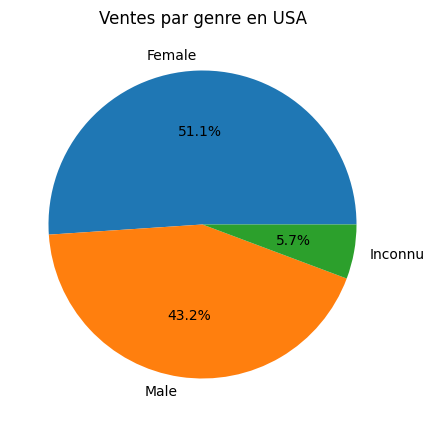

In [24]:
plt.figure(figsize = (10,5))
usa_gender.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Ventes par genre en USA')

In [26]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [27]:
usa_sales = (
    usa
    .groupby('date')
    .size()
    .sort_index(ascending = True)
)
usa_sales

date
2021-03-01    10
2021-03-02    15
2021-03-03     7
2021-03-04    10
2021-03-05    10
2021-03-06    12
2021-03-07    16
2021-03-08     7
2021-03-09     9
2021-03-10    12
2021-03-11     8
2021-03-12     7
2021-03-13     9
2021-03-14    15
2021-03-15     7
2021-03-16    17
2021-03-17    17
2021-03-18     9
2021-03-19    11
2021-03-20    19
2021-03-21    10
2021-03-22     8
2021-03-23     7
2021-03-24     8
2021-03-25    15
2021-03-26     9
2021-03-27    18
2021-03-28    13
2021-03-29    11
2021-03-30     7
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '2021-03-01 00:00:00'),
  Text(1, 0, '2021-03-02 00:00:00'),
  Text(2, 0, '2021-03-03 00:00:00'),
  Text(3, 0, '2021-03-04 00:00:00'),
  Text(4, 0, '2021-03-05 00:00:00'),
  Text(5, 0, '2021-03-06 00:00:00'),
  Text(6, 0, '2021-03-07 00:00:00'),
  Text(7, 0, '2021-03-08 00:00:00'),
  Text(8, 0, '2021-03-09 00:00:00'),
  Text(9, 0, '2021-03-10 00:00:00'),
  Text(10, 0, '2021-03-11 00:00:00'),
  Text(11, 0, '2021-03-12 00:00:00'),
  Text(12, 0, '2021-03-13 00:00:00'),
  Text(13, 0, '2021-03-14 00:00:00'),
  Text(14, 0, '2021-03-15 00:00:00'),
  Text(15, 0, '2021-03-16 00:00:00'),
  Text(16, 0, '2021-03-17 00:00:00'),
  Text(17, 0, '2021-03-18 00:00:00'),
  Text(18, 0, '2021-03-19 00:00:00'),
  Text(19, 0, '2021-03-20 00:00:00'),
  Text(20, 0, '2021-03-21 00:00:00'),
  Text(21, 0, '2021-03-22 00:00:00'),
  Text(22, 0, '2021-03-23 00:00:00')

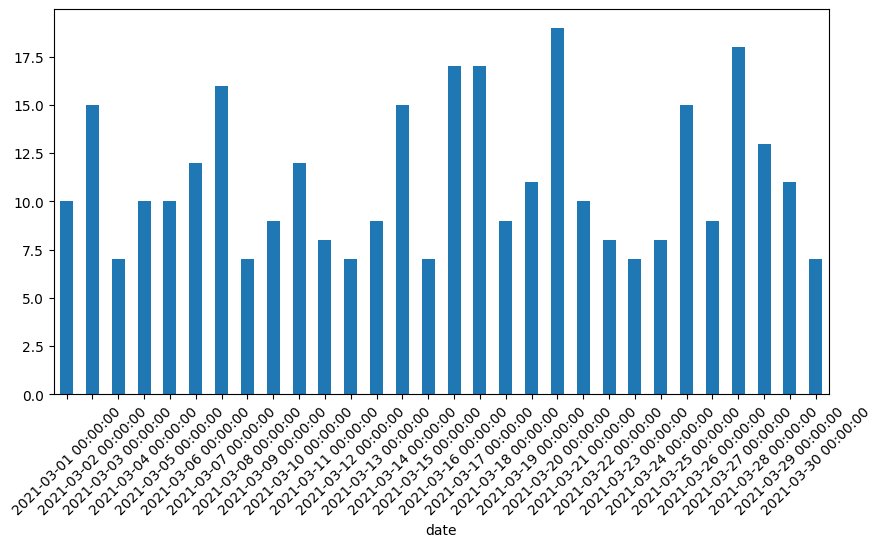

In [25]:
plt.figure(figsize = (10,5))
usa_sales.plot(kind = 'bar')
plt.xticks(rotation = 45)